# Maximum likelihood

The maximum likelihood method allows us to estimate the most appropriate parameters of the selected distribution for the data obtained.

## Idea

Let we selected some distribution $D(\overline{\theta})$. Where $\overline{\theta} = (\theta_1, \theta_2, ..., \theta_k)$ parameters of $D$. We need to find such a $\overline{\theta}^*$ that allows us to get the closest distribution to the observed data. 

What do we mean by "closest distribution"? According to the maximum likelihood method, the closest distribution is the distribution such that observed values are most likely to be observed when drawn from that distribution.

If we have chosen parameters $\overline{\theta}$, the probability that our values are taken from this distribution can be written as:

$$L(X^n, \overline{\theta})=\prod_{i =1}^n f(x_i, \overline{\theta})$$

Where $f(x_i, \overline{\theta})$ - probability density function of the studied distribution at the point $x_i$.

So we need to find $\overline{\theta}^*$ such that $L(X^n, \overline{\theta})$ is minimal. So we need to find x such that L is minimal. We have arrived at an optimisation problem which can be formally written as follows:

$$\overline{\theta}^* = argmax_{\overline{\theta}}[L(X^n, \overline{\theta})]$$

In this way, the distribution $D(\overline{\theta}^*)$ will best describe the observed sample in the sense of the maximum likelihood method.

## Logarithmisation

Use the logarithm properties:
- $log(ab) = log(a) + log(b)$ - allows us to change the product to the sum;
- $a>b \Leftrightarrow log(a) > log(b)$ - allows you to logarithmise the function being optimised without changing the solution.

So:

$$argmax_{\overline{\theta}}[L(X^n, \overline{\theta})] = argmax_{\overline{\theta}}[log\{L(X^N, \overline{\theta})\}].$$

And

$$log\left\{\prod_{i =1}^n f(x_i, \overline{\theta})\right\} = \sum_{i=1}^n log[f(x_i, \overline{\theta})].$$

This is a common operation for this task because it's easier to work with the sum than with the product when differentiating.

## Example

Consider the range of values from the open dataset. It's distribution actually looks like a gamma distribution. But the gamma distribution changes significantly for different values of the parameters.

The next cell shows the histogram for the variable under consideration and the density function for the gamma distribution with different values of the parameters. Some density functions are closer to the observed distribution, others are not so good - so we need to find such values for the parameters that give us the best approximation.

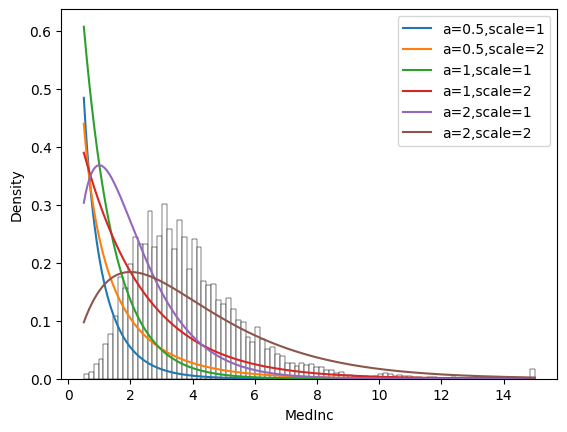

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from scipy.stats import gamma

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1]

obs_count = len(df)

lin_space = np.linspace(
    df["MedInc"].min(), 
    df["MedInc"].max(), 
    500
)

legend_list = []
sns.histplot(df["MedInc"], stat="density", color = "white")
for a in [0.5, 1, 2]:
    for scale in [1, 2]:
        plt.plot(
            lin_space,
            gamma(a=a, scale=scale).pdf(lin_space)
        )
        legend_list.append(f"a={a},scale={scale}")

plt.legend(legend_list)
plt.show()

The following cell uses `science.optimise.minimize` to find parameters that minimise minus likelihood $\rightarrow$ maximise plus likelihood.

In [84]:
import numpy as np
from scipy.optimize import minimize

def comp_LL(params):
    a, scale = params
    return -np.log(gamma(a=a, scale=scale).pdf(df["MedInc"])).sum()

params0 = (1,2)
solution = minimize(comp_LL, params0, method="L-BFGS-B")
a, scale = solution.x

print(f"a={a}, scale={scale}")

a=4.749062812131639, scale=0.8150390969482916


Now let's try these parameters to plot the density function - wow, it's really close!

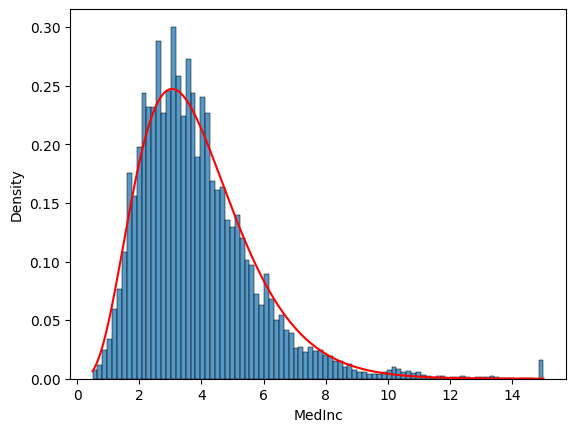

In [86]:
sns.histplot(df["MedInc"], stat = "density")

lin_space = np.linspace(
    df["MedInc"].min(), 
    df["MedInc"].max(), 
    500
)

plt.plot(
    lin_space,
    gamma(a=a, scale=scale).pdf(lin_space),
    color="red"
)
plt.show()